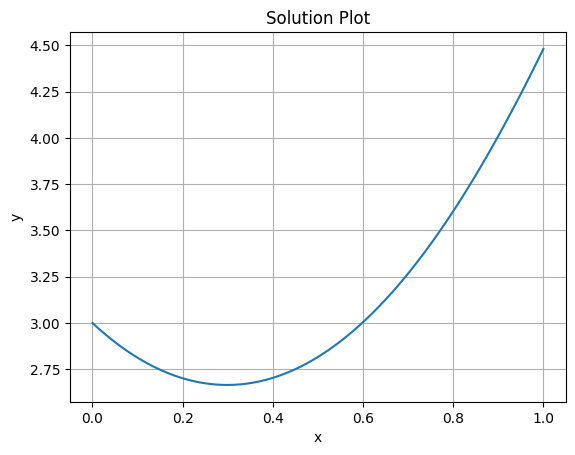

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def bvpexam_rhs(y, x):
    return [y[1], -(x**2 - np.sin(x)) * y[1] + np.cos(x)**2 * y[0] + 5]

xspan = [0, 1]  # x range
A = -3  # initial derivative value
dA = 0.5  # step size for derivative adjustment

for j in range(100):
    y0 = [3, A]  # initial condition
    x = np.linspace(xspan[0], xspan[1], 100)  # grid for odeint
    ysol = odeint(bvpexam_rhs, y0, x)  # solve ODE
    
    if abs(ysol[-1, 1] - 5) < 10**(-6):  # check convergence
        break
    
    if ysol[-1, 1] < 5:  # adjust launch angle
        A += dA  # if below five, make A bigger
    else:
        A -= dA  # if above five, make A smaller
        dA /= 2  # refine search now

# Plot the solution
plt.plot(x, ysol[:, 0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution Plot')
plt.grid(True)
plt.show()
